In [1]:
from auxiliarymethods import datasets as dp
from auxiliarymethods.reader import tud_to_networkx
import auxiliarymethods.auxiliary_methods as aux
import os
import numpy as np
from lib import *
import pickle


/home/markus/Documents/uni/WS22/DM/P1/DataMiningAssignment/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# hyper parameter
iterations = 5 # weierfeiler-lehman iterations
k = 900
alpha = .85
delta_affine = .5
delta_dist = .5
min_samples = 2

In [3]:
# pickling
pickle_path = 'pickles'
# files can be found here
# https://ucloud.univie.ac.at/index.php/s/pjLEBg8rCJWdaJ2

In [4]:
# utility functions
def load_csv(path):
    return np.loadtxt(path, delimiter=";")

In [5]:
base_path = os.path.join("kernels", "without_labels")
ds_name = "IMDB-BINARY"


In [6]:
#Gram Matrix for the Weisfeiler-Lehman subtree kernel
try:
    gram = load_csv(os.path.join(base_path,f"{ds_name}_gram_matrix_wl{iterations}.csv"))
except:
    ds_name = "IMDB-BINARY"
    classes = dp.get_dataset(ds_name)
    G = tud_to_networkx(ds_name)
    print(f"Number of graphs in data set is {len(G)}")
    print(f"Number of classes {len(set(classes.tolist()))}")
    gram = load_csv(os.path.join(base_path,f"{ds_name}_gram_matrix_wl{iterations}.csv"))
finally:
    gram = aux.normalize_gram_matrix(gram)

In [7]:
# partitioning
try:
    # reading
    point_info = pickle.load(open(os.path.join(pickle_path, f'point_info_{iterations}_{k}_{alpha}.p'), 'rb'))
    partitions = pickle.load(open(os.path.join(pickle_path, f'partitions_{iterations}_{k}_{alpha}.p'), 'rb'))
except:
    # *** COMPUTATION ***
    point_info, partitions = make_partitions(gram, k, alpha)
    # writing
    pickle.dump(point_info, open(os.path.join(pickle_path, f'point_info_{iterations}_{k}_{alpha}.p'), 'wb'))
    pickle.dump(partitions, open(os.path.join(pickle_path, f'partitions_{iterations}_{k}_{alpha}.p'), 'wb'))

In [8]:
# clustering
try:
    # reading
    models = pickle.load(open(os.path.join(pickle_path, f'models_{iterations}_{k}_{alpha}_{delta_affine}_{delta_dist}_{min_samples}.p'), 'rb'))
    clusters = pickle.load(open(os.path.join(pickle_path, f'clusters_{iterations}_{k}_{alpha}_{delta_affine}_{delta_dist}_{min_samples}.p'), 'rb'))
    cluster_info = pickle.load(open(os.path.join(pickle_path, f'cluster_info_{iterations}_{k}_{alpha}_{delta_affine}_{delta_dist}_{min_samples}.p'), 'rb'))
except:
    # *** COMPUTATION ***
    models, clusters = cluster_partitions(gram, partitions, point_info, delta_affine, delta_dist, min_samples)
    cluster_info = compute_cluster_list(clusters, gram)
    # writing
    pickle.dump(models, open(os.path.join(pickle_path, f'models_{iterations}_{k}_{alpha}_{delta_affine}_{delta_dist}_{min_samples}.p'), 'wb'))
    pickle.dump(clusters, open(os.path.join(pickle_path, f'clusters_{iterations}_{k}_{alpha}_{delta_affine}_{delta_dist}_{min_samples}.p'), 'wb'))
    pickle.dump(cluster_info, open(os.path.join(pickle_path, f'cluster_info_{iterations}_{k}_{alpha}_{delta_affine}_{delta_dist}_{min_samples}.p'), 'wb'))



In [10]:
# hierarchy
try:
    # reading
    hierarchy = pickle.load(open(os.path.join(pickle_path, f'hierarchy_{iterations}_{k}_{alpha}_{delta_affine}_{delta_dist}_{min_samples}.p'), 'rb'))
except:
    # *** COMPUTATION ***
    hierarchy = build_hierarchy(cluster_info, delta_affine, delta_dist, 1000)
    # writing
    pickle.dump(hierarchy, open(os.path.join(pickle_path, f'hierarchy_{iterations}_{k}_{alpha}_{delta_affine}_{delta_dist}_{min_samples}.p'), 'wb'))

Keys: 109


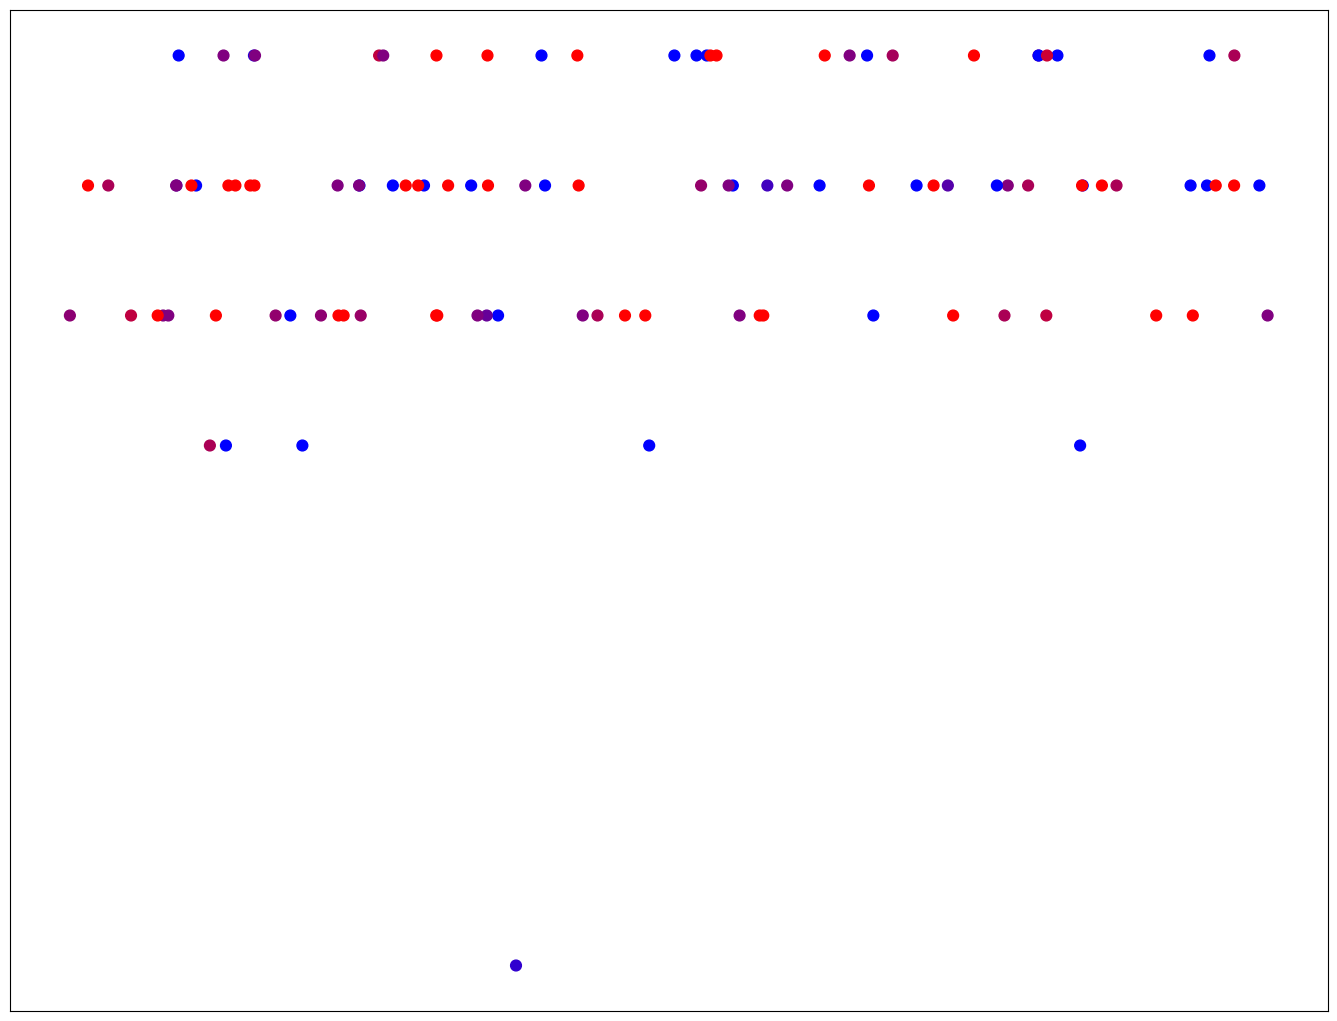

In [14]:
from elki_parser import draw_graph
from matplotlib import pyplot as plt

fig = plt.figure()
fig.set_figheight(13)
fig.set_figwidth(17)
draw_graph(hierarchy, plt)
plt.show()